# Setup

In [43]:
import pandas as pd
import numpy as np
import scipy

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

***
# Завдання першого рівня
Виконати всі завдання, використовуючи як numpy array, так і dataframe, проаналізувати часові витрати на виконання процедур (профілювання часу виконання), зробити висновки щодо ситуацій, в яких має сенс віддати перевагу тій чи іншій структурі даних. Висновки оформити звітом із зазначеним часом виконання та оцінкою по 5-бальній шкалі зручності виконання операцій відбору).

## Reading and Dropping

In [44]:
dictionary_for_needed_type = {
    'Global_active_power': 'float64',
    'Global_reactive_power': 'float64',
    'Voltage': 'float64',
    'Global_intensity': 'float64',
    'Sub_metering_1': 'float64',
    'Sub_metering_2': 'float64',
    'Sub_metering_3': 'float64',
                             }

In [45]:
df = pd.read_csv("household_power_consumption.txt", sep=";", low_memory=False)
nar = df.values

In [46]:
df.replace('?', pd.NA, inplace=True)
df.dropna(inplace=True)

nar = np.delete(nar, np.where(nar == '?'), 0)

In [47]:
df = df.astype(dictionary_for_needed_type)
ar = np.concatenate((nar[:, [0, 1]], nar[:, [2, 3, 4, 5]].astype(float), nar[:, [6, 7, 8]].astype(float).astype(int)), axis=1)

## 1. Обрати всі домогосподарства, у яких загальна активна споживана потужність перевищує 5 кВт.

In [48]:
def get_df_first(df):
    df_first = df[df["Global_active_power"]>5][["Date", "Time", 'Global_active_power', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']]
    return df_first
    
    
def get_ar_first(ar):
    ar_first = ar[ar[..., 2]>5]
    return ar_first

%timeit -r 2 -n 100 get_df_first(df)
%timeit -r 2 -n 100 get_ar_first(ar)

df_first = get_df_first(df)
ar_first = get_ar_first(ar)

8.51 ms ± 136 µs per loop (mean ± std. dev. of 2 runs, 100 loops each)
63 ms ± 689 µs per loop (mean ± std. dev. of 2 runs, 100 loops each)


In [49]:
df_first

,Date,Time,Global_active_power,Sub_metering_1,Sub_metering_2,Sub_metering_3
1,16/12/2006,17:25:00,5.360,0.0,1.0,16.0
2,16/12/2006,17:26:00,5.374,0.0,2.0,17.0
3,16/12/2006,17:27:00,5.388,0.0,1.0,17.0
11,16/12/2006,17:35:00,5.412,0.0,1.0,17.0
12,16/12/2006,17:36:00,5.224,0.0,1.0,16.0
...,...,...,...,...,...,...
2069356,22/11/2010,18:40:00,5.408,48.0,0.0,0.0
2069357,22/11/2010,18:41:00,5.528,53.0,0.0,0.0
2071586,24/11/2010,07:50:00,5.172,0.0,38.0,17.0
2071587,24/11/2010,07:51:00,5.750,0.0,39.0,17.0


In [50]:
pd.DataFrame.from_records(ar_first)[[0, 1, 2, 6, 7, 8]]

,0,1,2,6,7,8
0,16/12/2006,17:25:00,5.360,0,1,16
1,16/12/2006,17:35:00,5.412,0,1,17
2,16/12/2006,17:36:00,5.224,0,1,16
3,16/12/2006,17:37:00,5.268,0,2,17
4,16/12/2006,17:44:00,5.894,0,0,16
...,...,...,...,...,...,...
17540,22/11/2010,18:40:00,5.408,48,0,0
17541,22/11/2010,18:41:00,5.528,53,0,0
17542,24/11/2010,07:50:00,5.172,0,38,17
17543,24/11/2010,07:51:00,5.750,0,39,17


## 2. Обрати всі домогосподарства, у яких вольтаж перевищую 235 В.

In [51]:
def get_df_second(df):
    df_second = df[df["Voltage"]>235][["Date", "Time", 'Voltage', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']]
    return df_second
    
    
def get_ar_second(ar):
    ar_second = ar[ar[..., 4]>235]
    return ar_second


%timeit -r 2 -n 100 get_df_second(df)
%timeit -r 2 -n 100 get_ar_second(ar)

df_second = get_df_second(df)
ar_second = get_ar_second(ar)

218 ms ± 3.78 ms per loop (mean ± std. dev. of 2 runs, 100 loops each)
203 ms ± 9 ms per loop (mean ± std. dev. of 2 runs, 100 loops each)


In [52]:
df_second

,Date,Time,Voltage,Sub_metering_1,Sub_metering_2,Sub_metering_3
4,16/12/2006,17:28:00,235.68,0.0,1.0,17.0
5,16/12/2006,17:29:00,235.02,0.0,2.0,17.0
6,16/12/2006,17:30:00,235.09,0.0,1.0,17.0
7,16/12/2006,17:31:00,235.22,0.0,1.0,17.0
14,16/12/2006,17:38:00,235.24,0.0,1.0,17.0
...,...,...,...,...,...,...
2075254,26/11/2010,20:58:00,240.43,0.0,0.0,0.0
2075255,26/11/2010,20:59:00,240.00,0.0,0.0,0.0
2075256,26/11/2010,21:00:00,239.82,0.0,0.0,0.0
2075257,26/11/2010,21:01:00,239.70,0.0,0.0,0.0


In [53]:
pd.DataFrame.from_records(ar_second)[[0, 1, 4, 6, 7, 8]]

,0,1,4,6,7,8
0,16/12/2006,17:38:00,235.24,0,1,17
1,16/12/2006,17:39:00,237.14,0,0,17
2,16/12/2006,17:40:00,236.73,0,0,17
3,16/12/2006,17:41:00,237.06,0,0,17
4,16/12/2006,17:42:00,237.13,0,0,18
...,...,...,...,...,...,...
1952482,26/11/2010,20:58:00,240.43,0,0,0
1952483,26/11/2010,20:59:00,240.00,0,0,0
1952484,26/11/2010,21:00:00,239.82,0,0,0
1952485,26/11/2010,21:01:00,239.70,0,0,0


## 3. Обрати всі домогосподарства, у яких сила струму лежить в межах 19-20 А, для них виявити ті, у яких пральна машина та холодильних споживають більше, ніж бойлер та кондиціонер.

In [54]:
def get_df_third(df):
    df_third = df[(df["Global_intensity"] >= 19) & (df["Global_intensity"] <= 20) & (df["Sub_metering_2"] > df["Sub_metering_3"])][["Date", "Time", 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']]
    return df_third
    
    
def get_ar_third(ar):
    ar_third = ar[(ar[:, 5]>=19) & (ar[:, 5]<=20) & (ar[:, 7]>ar[:, 8])]
    return ar_third


%timeit -r 2 -n 100 get_df_third(df)
%timeit -r 2 -n 100 get_ar_third(ar)

df_third = get_df_third(df)
ar_third = get_ar_third(ar)

11.9 ms ± 44.1 µs per loop (mean ± std. dev. of 2 runs, 100 loops each)
142 ms ± 702 µs per loop (mean ± std. dev. of 2 runs, 100 loops each)


In [55]:
df_third

,Date,Time,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
45,16/12/2006,18:09:00,19.0,0.0,37.0,16.0
460,17/12/2006,01:04:00,19.6,0.0,13.0,0.0
464,17/12/2006,01:08:00,19.6,0.0,27.0,0.0
475,17/12/2006,01:19:00,19.4,0.0,36.0,0.0
476,17/12/2006,01:20:00,19.4,0.0,35.0,0.0
...,...,...,...,...,...,...
2071589,24/11/2010,07:53:00,19.8,0.0,39.0,17.0
2071590,24/11/2010,07:54:00,19.8,0.0,39.0,18.0
2071591,24/11/2010,07:55:00,19.4,0.0,40.0,17.0
2071592,24/11/2010,07:56:00,19.0,0.0,39.0,17.0


In [88]:
pd.DataFrame.from_records(ar_third)

,0,1,2,3,4,5,6,7,8
0,16/12/2006,18:09:00,4.464,0.136,234.66,19.0,0,37,16
1,17/12/2006,01:04:00,4.582,0.258,238.08,19.6,0,13,0
2,17/12/2006,01:08:00,4.618,0.104,239.61,19.6,0,27,0
3,17/12/2006,01:19:00,4.636,0.140,237.37,19.4,0,36,0
4,17/12/2006,01:20:00,4.634,0.152,237.17,19.4,0,35,0
...,...,...,...,...,...,...,...,...,...
2504,24/11/2010,07:53:00,4.666,0.000,235.72,19.8,0,39,17
2505,24/11/2010,07:54:00,4.694,0.000,236.78,19.8,0,39,18
2506,24/11/2010,07:55:00,4.602,0.000,237.08,19.4,0,40,17
2507,24/11/2010,07:56:00,4.536,0.000,237.03,19.0,0,39,17


## 4. Обрати випадковим чином 500000 домогосподарств (без повторів елементів вибірки), для них обчислити середні величини усіх 3-х груп споживання електричної енергії, а також

In [57]:
random_df = df.sample(500000)
random_ar = random_df.values

    
    
def get_df_fourth(df):
    random_df['Average_of_3'] = (random_df['Sub_metering_1']+random_df['Sub_metering_2']+random_df['Sub_metering_3'])/3
    df_fourth = random_df[["Date", "Time", 'Average_of_3', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']]
    return df_fourth
    
    
def get_ar_fourth(ar):
    a = np.average(random_ar[..., [6, 7, 8]], axis=1)
    ar_fourth = np.column_stack((random_ar[:, [0, 1, 6, 7, 8]], a.reshape(a.size, 1)))
    return ar_fourth


%timeit -r 2 -n 100 get_df_fourth(df)
%timeit -r 2 -n 100 get_ar_fourth(ar)

df_fourth = get_df_fourth(df)
ar_fourth = get_ar_fourth(ar)

25.5 ms ± 447 µs per loop (mean ± std. dev. of 2 runs, 100 loops each)
92.1 ms ± 81.5 µs per loop (mean ± std. dev. of 2 runs, 100 loops each)


In [58]:
df_fourth

,Date,Time,Average_of_3,Sub_metering_1,Sub_metering_2,Sub_metering_3
1498693,22/10/2009,11:37:00,9.333333,0.0,0.0,28.0
1951784,2/9/2010,03:08:00,0.333333,0.0,0.0,1.0
1826595,7/6/2010,04:39:00,0.333333,0.0,0.0,1.0
455168,28/10/2007,19:32:00,0.333333,0.0,1.0,0.0
2015911,16/10/2010,15:55:00,0.000000,0.0,0.0,0.0
...,...,...,...,...,...,...
1462100,27/9/2009,01:44:00,0.333333,0.0,0.0,1.0
1056621,19/12/2008,11:45:00,5.666667,0.0,0.0,17.0
1735561,4/4/2010,23:25:00,1.000000,0.0,2.0,1.0
1797025,17/5/2010,15:49:00,6.666667,0.0,1.0,19.0


In [89]:
pd.DataFrame.from_records(ar_fourth)

,0,1,2,3,4,5
0,22/10/2009,11:37:00,0.0,0.0,28.0,9.333333
1,2/9/2010,03:08:00,0.0,0.0,1.0,0.333333
2,7/6/2010,04:39:00,0.0,0.0,1.0,0.333333
3,28/10/2007,19:32:00,0.0,1.0,0.0,0.333333
4,16/10/2010,15:55:00,0.0,0.0,0.0,0.000000
...,...,...,...,...,...,...
499995,27/9/2009,01:44:00,0.0,0.0,1.0,0.333333
499996,19/12/2008,11:45:00,0.0,0.0,17.0,5.666667
499997,4/4/2010,23:25:00,0.0,2.0,1.0,1.000000
499998,17/5/2010,15:49:00,0.0,1.0,19.0,6.666667


## 5. Обрати ті домогосподарства, які після 18-00 споживають понад 6 кВт за хвилину в середньому, серед відібраних визначити ті, у яких основне споживання електроенергії у вказаний проміжок часу припадає на пральну машину, сушарку, холодильник та освітлення (група 2 є найбільшою), а потім обрати кожен третій результат із першої половини та кожен четвертий результат із другої половини.

In [60]:
def get_fifth_df(df):
    fifth_df = df[(df['Time']>= "18:30:00") & (df['Global_active_power']>6) & (df["Sub_metering_2"]>df["Sub_metering_1"]) & (df["Sub_metering_2"]>df["Sub_metering_3"])]
    # fifth_df
    order = []
    for i in range(0, len(fifth_df)//2, 3):
        order.append(fifth_df.iloc[i])
    for i in range(len(fifth_df)//2, len(fifth_df), 4):
        order.append(fifth_df.iloc[i])

    df_fifth = pd.DataFrame.from_records(order)
    # print(df_fifth)
    return df_fifth
    
    
def get_fifth_ar(ar):
    ar_fifth = ar[(ar[..., 1]>="18:30:00") & (ar[..., 2]>6) & (ar[..., 7]>ar[..., 8])& (ar[..., 7]>ar[..., 6])]
    order = []
    for i in range(0, len(ar_fifth)//2, 3):
        order.append(ar_fifth[i])
    for i in range(len(ar_fifth)//2, len(ar_fifth), 4):
        order.append(ar_fifth[i])
    # end_time = np.datetime64('now', 'ms')
    fifth_ar = pd.DataFrame.from_records(order).values
    return fifth_ar


%timeit -r 2 -n 10 get_fifth_df(df)
%timeit -r 2 -n 10 get_fifth_ar(ar)

fifth_df = get_fifth_df(df)
fifth_ar = get_fifth_ar(ar)

159 ms ± 892 µs per loop (mean ± std. dev. of 2 runs, 10 loops each)
160 ms ± 600 µs per loop (mean ± std. dev. of 2 runs, 10 loops each)


In [61]:
fifth_df

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,18:35:00,6.072,0.000,232.48,26.4,0.0,27.0,17.0
1,28/12/2006,21:00:00,6.376,0.252,235.94,27.4,1.0,53.0,17.0
2,28/12/2006,21:03:00,7.906,0.286,235.93,33.6,1.0,73.0,17.0
3,28/12/2006,21:06:00,7.184,0.000,235.70,30.4,2.0,73.0,17.0
4,28/12/2006,21:09:00,7.210,0.000,236.14,30.4,1.0,73.0,17.0
...,...,...,...,...,...,...,...,...,...
273,20/11/2010,18:30:00,6.620,0.314,229.00,29.2,18.0,34.0,16.0
274,20/11/2010,18:34:00,6.266,0.360,229.82,27.6,14.0,35.0,16.0
275,20/11/2010,18:38:00,6.302,0.376,229.65,27.8,15.0,34.0,17.0
276,20/11/2010,18:42:00,6.238,0.344,229.37,27.6,14.0,35.0,16.0


In [90]:
pd.DataFrame.from_records(fifth_ar)

,0,1,2,3,4,5,6,7,8
0,16/12/2006,18:35:00,6.072,0.000,232.48,26.4,0,27,17
1,28/12/2006,21:00:00,6.376,0.252,235.94,27.4,1,53,17
2,28/12/2006,21:03:00,7.906,0.286,235.93,33.6,1,73,17
3,28/12/2006,21:06:00,7.184,0.000,235.70,30.4,2,73,17
4,28/12/2006,21:09:00,7.210,0.000,236.14,30.4,1,73,17
...,...,...,...,...,...,...,...,...,...
273,20/11/2010,18:30:00,6.620,0.314,229.00,29.2,18,34,16
274,20/11/2010,18:34:00,6.266,0.360,229.82,27.6,14,35,16
275,20/11/2010,18:38:00,6.302,0.376,229.65,27.8,15,34,17
276,20/11/2010,18:42:00,6.238,0.344,229.37,27.6,14,35,16


***
# *Завдання другого рівня*

Виконати всі завдання, використовуючи як numpy array, так і dataframe

Датасет має відповідати таким вимогам:
- Data Set Characteristics: Multivariate
- Attribute Characteristics: Categorical, Integer, Real
- Number of Attributes: at least 2 integers/real
- Missing Values? YES!!!!!

In [63]:
df = pd.read_csv("pokemon.csv")

In [64]:
df.isnull().sum()

abilities              0
against_bug            0
against_dark           0
against_dragon         0
against_electric       0
against_fairy          0
against_fight          0
against_fire           0
against_flying         0
against_ghost          0
against_grass          0
against_ground         0
against_ice            0
against_normal         0
against_poison         0
against_psychic        0
against_rock           0
against_steel          0
against_water          0
attack                 0
base_egg_steps         0
base_happiness         0
base_total             0
capture_rate           0
classfication          0
defense                0
experience_growth      0
height_m              20
hp                     0
japanese_name          0
name                   0
percentage_male       98
pokedex_number         0
sp_attack              0
sp_defense             0
speed                  0
type1                  0
type2                384
weight_kg             20
generation             0


## 1. Поборотися із зниклими даними.

In [65]:
df[['height_m', 'weight_kg']] = df[['height_m', 'weight_kg']].bfill()
# df = df.fillna(method='ffill')

In [66]:
df.isnull().sum()

abilities              0
against_bug            0
against_dark           0
against_dragon         0
against_electric       0
against_fairy          0
against_fight          0
against_fire           0
against_flying         0
against_ghost          0
against_grass          0
against_ground         0
against_ice            0
against_normal         0
against_poison         0
against_psychic        0
against_rock           0
against_steel          0
against_water          0
attack                 0
base_egg_steps         0
base_happiness         0
base_total             0
capture_rate           0
classfication          0
defense                0
experience_growth      0
height_m               0
hp                     0
japanese_name          0
name                   0
percentage_male       98
pokedex_number         0
sp_attack              0
sp_defense             0
speed                  0
type1                  0
type2                384
weight_kg              0
generation             0


## 2. Пронормувати вибраний датасет або стандартизувати його.

In [67]:
df_num = df[['attack', 'defense', 'hp', "speed", "sp_attack", "sp_defense"]]

normalized_df_num = (df_num-df_num.min())/(df_num.max()-df_num.min())
#normalized_df_num.max()

copy_df = df.copy()
copy_df[['attack', 'defense', 'hp', "speed", "sp_attack", "sp_defense"]] = normalized_df_num

normilized_df = copy_df
# normilized_df
#standatrized_df_num = (df_num - df_num.mean()) / df_num.std()
#print(standatrized_df_num.mean().apply(lambda x: "{:.6f}".format(x)))
#print(standatrized_df_num.std())
#print(standatrized_df_num.var())
#standatrized_df_num

## 3. Збудувати гістограму по одному із атрибутів, що буде показувати на кількість елементів, що знаходяться у 10 діапазонах, які ви задасте.

<Axes: ylabel='Count'>

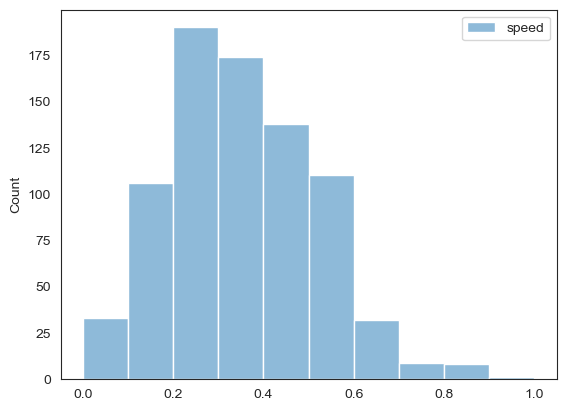

In [68]:
sns.set_style("white")
sns.histplot(normilized_df[["speed"]], bins=10)

## 4. Збудувати графік залежності одного integer/real атрибута від іншого.

<Axes: xlabel='against_water', ylabel='against_flying'>

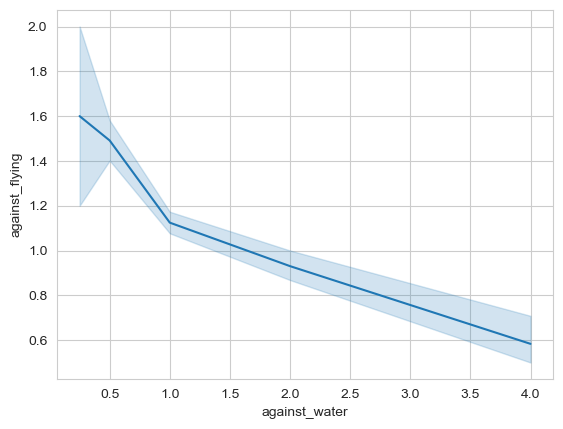

In [69]:
sns.set_style("whitegrid")
sns.lineplot(normilized_df[["against_flying", 'against_water']], y='against_flying', x='against_water') #, hue='is_legendary')

## 5. Підрахувати коефіцієнт Пірсона та Спірсона для двох integer/real атрибутів.

In [70]:
pear = scipy.stats.pearsonr(normilized_df["attack"], normilized_df['sp_attack'])
spear = scipy.stats.spearmanr(normilized_df["attack"], normilized_df['sp_attack'])

print(f"Для Атаки та СпецАтаки: \nкоефіцієнт Пірсона: {pear}, \nкоефіцієнт Спірсона: {spear}.")

Для Атаки та СпецАтаки: 
коефіцієнт Пірсона: PearsonRResult(statistic=0.3681539995496, pvalue=4.085321011485405e-27), 
коефіцієнт Спірсона: SignificanceResult(statistic=0.34953693624222054, pvalue=1.9700999545935824e-24).


## 6. Провести One Hot Encoding категоріального string атрибуту.

In [71]:
ohe = OneHotEncoder(handle_unknown='ignore')

In [86]:
a = ohe.fit(normilized_df['type1'].values.reshape(-1, 1))

In [87]:
ohe.categories_

[array(['bug', 'dark', 'dragon', 'electric', 'fairy', 'fighting', 'fire',
        'flying', 'ghost', 'grass', 'ground', 'ice', 'normal', 'poison',
        'psychic', 'rock', 'steel', 'water'], dtype=object)]

## 7. Провести візуалізацію багатовимірних даних.

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


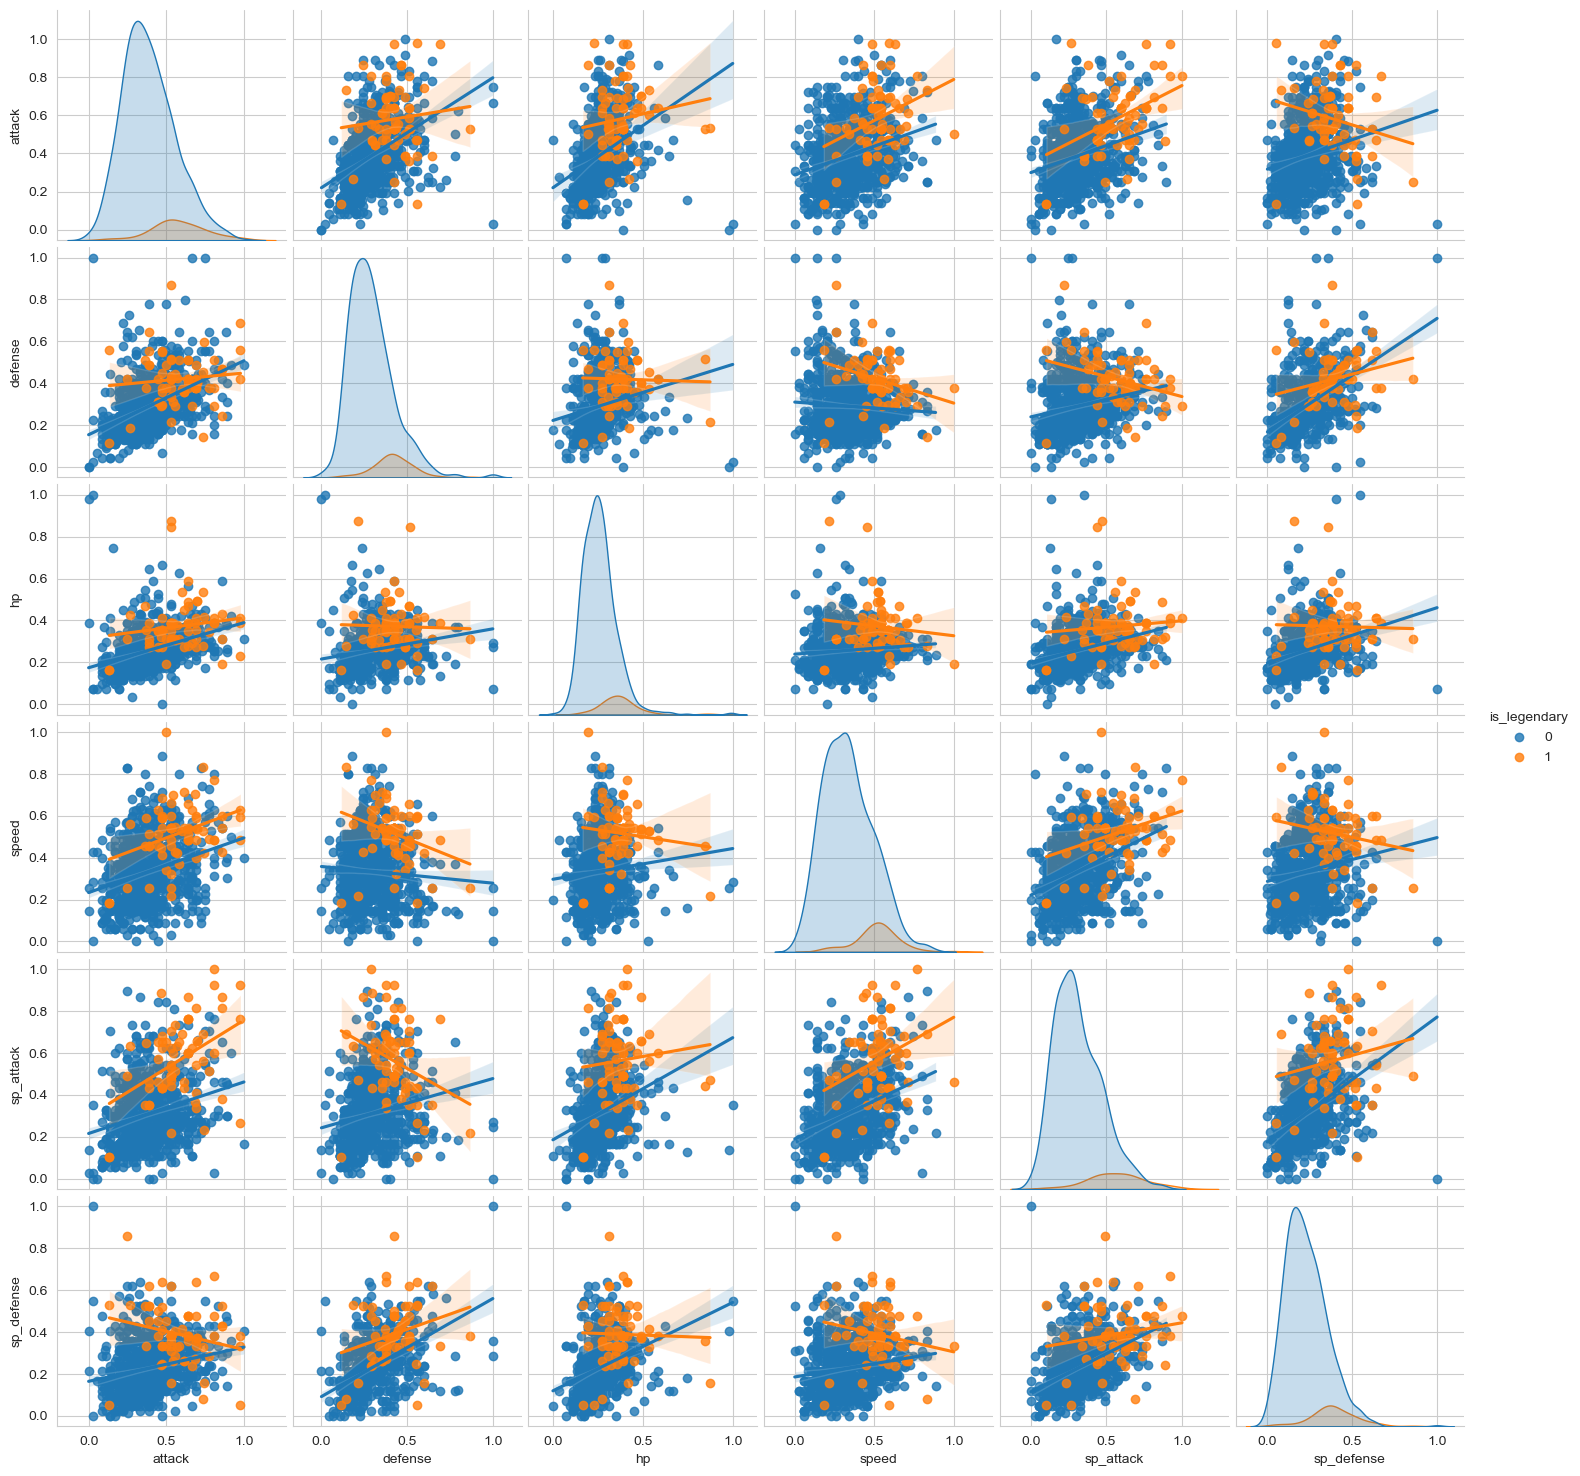

In [74]:
sns.pairplot(normilized_df[['attack', 'defense', 'hp', "speed", "sp_attack", "sp_defense", 'is_legendary']], hue="is_legendary", kind="reg")

***
# *Додаткове завдання*:  

## 8. Поділити випадковим чином датасет на дві рівні частини. Навчити 3 регресійні моделі на основі не менше одного атрибуту відновлювати інший. Навчання має відбуватися на основі [першого датасету](https://scikit-learn.org/stable/modules/linear_model.html), візуалізувати моделі та на основі [середньої квадратичної помилки](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html) вибрати найкращу.

In [75]:
train_set, test_set = train_test_split(normilized_df, test_size=0.5, random_state=42)

In [76]:
test_set = test_set[:400]

In [77]:
train_set_a = np.atleast_2d(train_set['against_flying'])#.values.reshape(-1, 1)
train_set_sa = np.atleast_2d(train_set['against_water'])#.values.reshape(-1, 1)

dfplot_a = normilized_df['against_flying']#.values.reshape(-1, 1)
dfplot_sa = normilized_df['against_water']#.values.reshape(-1, 1)

test_set_a = np.atleast_2d(test_set['against_flying'])#.values.reshape(-1, 1)
test_set_sa = np.atleast_2d(test_set['against_water'])#.values.reshape(-1, 1)

In [78]:
linear_reg = LinearRegression()
linear_reg.fit(train_set_a, train_set_sa)

LinearRegression()

In [79]:
# Навчання регресії опорних векторів
svr_reg = SVR(kernel='linear')
svr_reg.fit(train_set['against_flying'].values.reshape(-1, 1), train_set['against_water'].values)

SVR(kernel='linear')

In [80]:
# Навчання регресії дерева рішень
tree_reg = DecisionTreeRegressor()
tree_reg.fit(train_set_a, train_set_sa)

DecisionTreeRegressor()

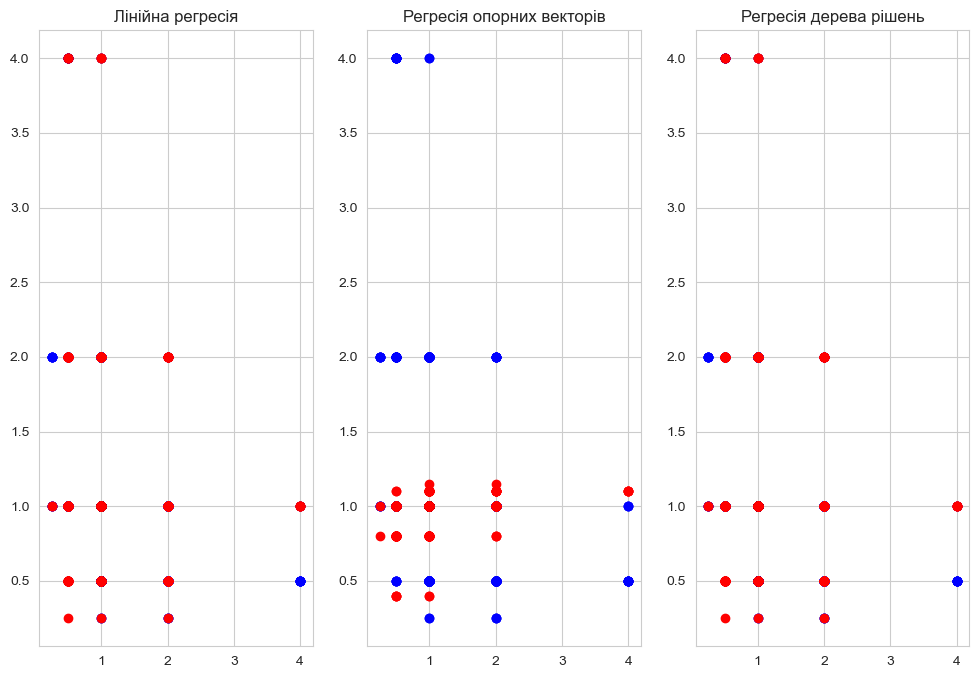

In [81]:
# Візуалізація результатів
plt.figure(figsize=(12, 8))

# Лінійна регресія
plt.subplot(1, 3, 1)
plt.scatter(dfplot_a, dfplot_sa, color='blue')
plt.scatter(test_set_sa, linear_reg.predict(test_set_a), color='red')
plt.title('Лінійна регресія')

# Регресія опорних векторів
plt.subplot(1, 3, 2)
plt.scatter(dfplot_a, dfplot_sa, color='blue')
plt.scatter(test_set_sa.reshape(-1, 1), svr_reg.predict(test_set_a.reshape(-1, 1)), color='red')
plt.title('Регресія опорних векторів')

# Регресія дерева рішень
plt.subplot(1, 3, 3)
plt.scatter(dfplot_a, dfplot_sa, color='blue')
plt.scatter(test_set_sa, tree_reg.predict(test_set_a), color='red')
plt.title('Регресія дерева рішень')

plt.show()

In [82]:
# Оцінка моделей за середньою квадратичною помилкою
mse_linear = mean_squared_error(test_set_sa, linear_reg.predict(test_set_a))
mse_svr = mean_squared_error(test_set_sa.reshape(-1, 1), svr_reg.predict(test_set_a.reshape(-1, 1)))
mse_tree = mean_squared_error(test_set_sa, tree_reg.predict(test_set_a))

print(f'MSE Лінійна регресія: {mse_linear}')
print(f'MSE Регресія опорних векторів: {mse_svr}')
print(f'MSE Регресія дерева рішень: {mse_tree}')

MSE Лінійна регресія: 0.79265625
MSE Регресія опорних векторів: 0.31282499999999996
MSE Регресія дерева рішень: 0.79265625
